In [76]:
import numpy as np
from glob import glob
import os
import pandas as pd
import sys
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load data

In [77]:
data_dir = '../data'

loadpaths_stim = glob(os.path.join(data_dir, 'ses_*', '*stimuli.csv'))
loadpaths_units = glob(os.path.join(data_dir, 'ses_*', '*units.csv'))
loadpaths_spike_times = glob(os.path.join(data_dir, 'ses_*', '*spike_times.npy'))

#### Pick session

In [78]:
session_id = '732592105'

for loadpath_stim, loadpath_units, loadpath_spike_times in zip(loadpaths_stim, loadpaths_units, loadpaths_spike_times):
    if session_id in loadpath_stim:
        df_stim = pd.read_csv(loadpath_stim)
        df_units = pd.read_csv(loadpath_units)
        spike_times = np.load(loadpath_spike_times, allow_pickle=True)[()]

In [79]:
root = Path(os.getcwd()).parent

In [104]:
sys.path.append(str(root))
sessions = (root/"data").glob("ses*")
for ses in sessions:
    print(ses.name)

ses_732592105
ses_737581020
ses_739448407
ses_742951821
ses_743475441
ses_744228101
ses_750332458
ses_750749662
ses_754312389
ses_754829445
ses_757216464
ses_757970808
ses_759883607
ses_761418226
ses_763673393
ses_799864342


In [ ]:
from utils import compute_psth

In [110]:
plt.rcParams.update({'font.size': 16})

#### Make histograms of change in firing rate from baseline to peak

<>:59: SyntaxWarning: invalid escape sequence '\D'
<>:59: SyntaxWarning: invalid escape sequence '\D'
C:\Users\atle_\AppData\Local\Temp\ipykernel_32440\371953095.py:59: SyntaxWarning: invalid escape sequence '\D'
  ax[-1,1].set_xlabel('$\Delta$ Firing rate (Hz)')


ses_754312389_mean_waveforms.npy
ses_754312389_spike_times.npy
ses_754312389_stimuli.csv
ses_754312389_units.csv
['VISam' 'VISpm' 'VISrl']


100%|██████████| 10/10 [00:55<00:00,  5.54s/it]


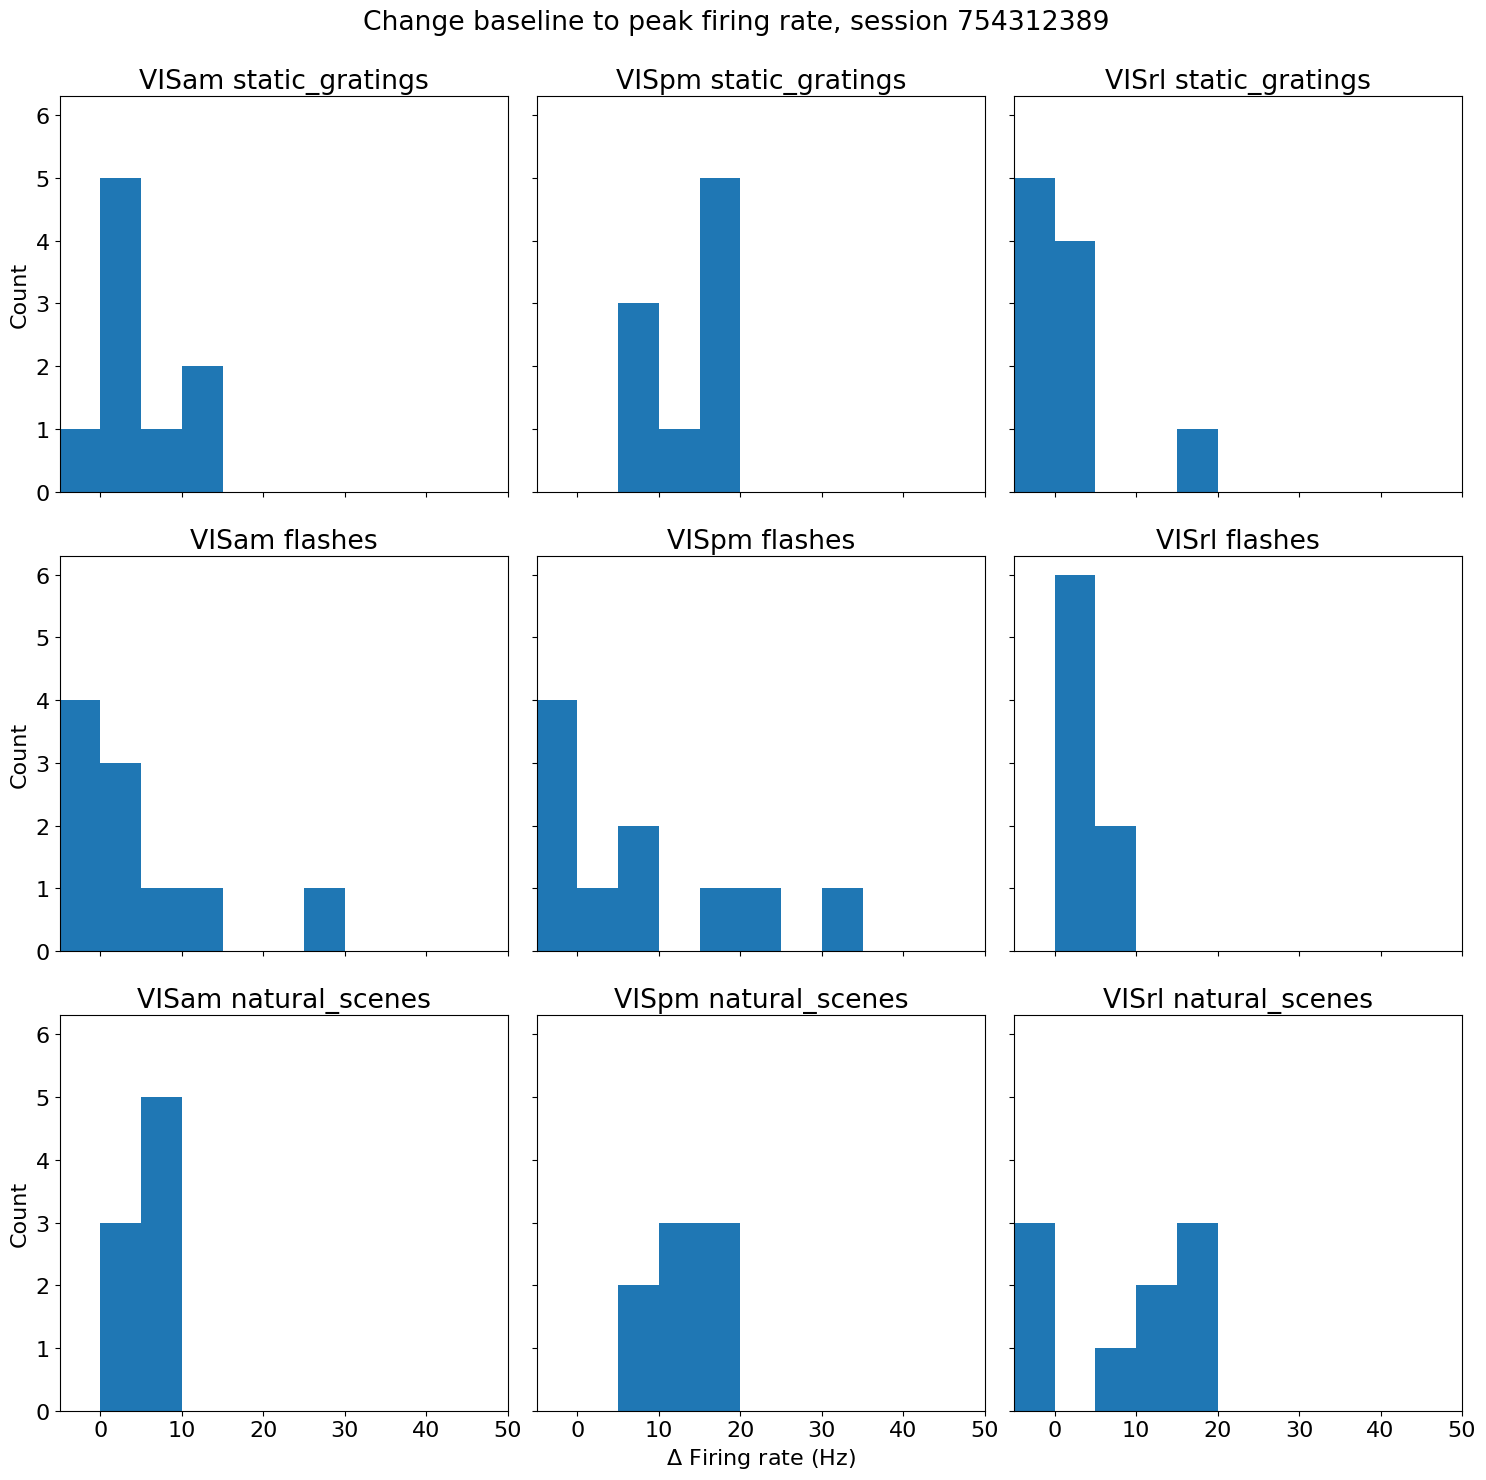

In [122]:
'''sys.path.append(str(root))
sessions = (root/"data").glob("ses*")
for ses in sessions:
    print(ses.name)'''

ses_name = "ses_754312389"
ses = root/"data"/ses_name
for file in ses.glob("*"):
    print(file.name)

units = pd.read_csv(ses/f"{ses.name}_units.csv", index_col=0)
print(units.ecephys_structure_acronym.unique())

stimuli = pd.read_csv(ses/f"{ses.name}_stimuli.csv", index_col=0)

spike_times = np.load(ses/f"{ses.name}_spike_times.npy", allow_pickle=True)
spike_times = spike_times.item()

fig, ax = plt.subplots(nrows = 3, ncols=3, figsize = (15,15), sharex=True, sharey = True)

bins = np.arange(-5,50,5)
np.random.seed(1)
sample_size = 10

for istim, stim_name in enumerate(['static_gratings', 'flashes', 'natural_scenes']):
    for istruct, structure_acronym in enumerate(units.ecephys_structure_acronym.unique()):
        units_v1 = units[units.ecephys_structure_acronym == structure_acronym]
        stimulus = stimuli[stimuli.stimulus_name==stim_name]
        stim_times = np.asarray(stimulus.start_time)

        psth_nrns = []

        inds_sampled = np.random.randint(0, np.min([len(units_v1.index),10]), sample_size)
        for i in tqdm(inds_sampled):

            spike_times_one_unit = spike_times[units_v1.index[i]]

            bin_centers, psth = compute_psth(spike_times_one_unit, stim_times, window=(-0.1, 0.25), bin_width=0.01)

            psth_nrns.append(psth)

        psth_nrns = np.asarray(psth_nrns)

        ind_stim_onset = 10
        psth_nrns = psth_nrns - np.mean(psth_nrns[:,:ind_stim_onset])

        peak_to_baseline = np.max(psth_nrns, axis = 1)

        #bins = np.linspace(np.floor(peak_to_baseline.min()), np.ceil(peak_to_baseline.max()), 10)
        
        ax[istim, istruct].hist(peak_to_baseline, bins=bins)

        ax[istim, istruct].set_title(structure_acronym + ' '+stim_name)

        ax[istim,0].set_ylabel('Count')

        ax[istim,istruct].set_xlim([-5,50])

ax[-1,1].set_xlabel('$\Delta$ Firing rate (Hz)')


fig.suptitle('Change baseline to peak firing rate, session '+ses_name.split('_')[-1], y = 0.99)

fig_name = 'baseline_to_peak_firing_rate.png'

fig.tight_layout()

fig.savefig(fig_name)

### Make histograms of delay to peak

In [ ]:
'''sys.path.append(str(root))
sessions = (root/"data").glob("ses*")
for ses in sessions:
    print(ses.name)'''
ses_name = "ses_754312389"
ses = root/"data"/ses_name
for file in ses.glob("*"):
    print(file.name)

units = pd.read_csv(ses/f"{ses.name}_units.csv", index_col=0)
print(units.ecephys_structure_acronym.unique())

stimuli = pd.read_csv(ses/f"{ses.name}_stimuli.csv", index_col=0)

spike_times = np.load(ses/f"{ses.name}_spike_times.npy", allow_pickle=True)
spike_times = spike_times.item()

fig, ax = plt.subplots(nrows = 3, ncols=3, figsize = (15,15), sharex=True, sharey = True)

bins = np.arange(0,30,2)
np.random.seed(1)
sample_size = 10

for istim, stim_name in enumerate(['static_gratings', 'flashes', 'natural_scenes']):
    for istruct, structure_acronym in enumerate(units.ecephys_structure_acronym.unique()):
        units_v1 = units[units.ecephys_structure_acronym == structure_acronym]
        stimulus = stimuli[stimuli.stimulus_name==stim_name]
        stim_times = np.asarray(stimulus.start_time)

        psth_nrns = []
        
        inds_sampled = np.random.randint(0, np.min([len(units_v1.index),10]), sample_size)
        for i in tqdm(inds_sampled):

            spike_times_one_unit = spike_times[units_v1.index[i]]

            bin_centers, psth = compute_psth(spike_times_one_unit, stim_times, window=(-0.1, 0.25), bin_width=0.01)

            psth_nrns.append(psth)

        psth_nrns = np.asarray(psth_nrns)

        ind_stim_onset = 10
        #psth_nrns = psth_nrns - np.mean(psth_nrns[:,:ind_stim_onset])

        delay = np.argmax(psth_nrns[:,ind_stim_onset:], axis = 1)

        bins = np.linspace(np.floor(delay.min()), np.ceil(delay.max()), 10)

        
        ax[istim, istruct].hist(delay, bins=bins)

        ax[istim, istruct].set_title(structure_acronym + ' '+stim_name)

        ax[istim,0].set_ylabel('Count')

        ax[istim,istruct].set_xlim([0,40])

ax[-1,1].set_xlabel('Time from stimulus onset (s)')


fig.suptitle('Delay to peak, session '+ses_name.split('_')[-1], y = 0.99)

fig_name = 'delay_to_peak_firing_rate.png'

fig.tight_layout()

fig.savefig(fig_name)

#### Make boxplots of change in firing rate from baseline to peak

[Text(-1, 0, 'static_gratings'),
 Text(0, 0, 'flashes'),
 Text(1, 0, 'natural_scenes')]

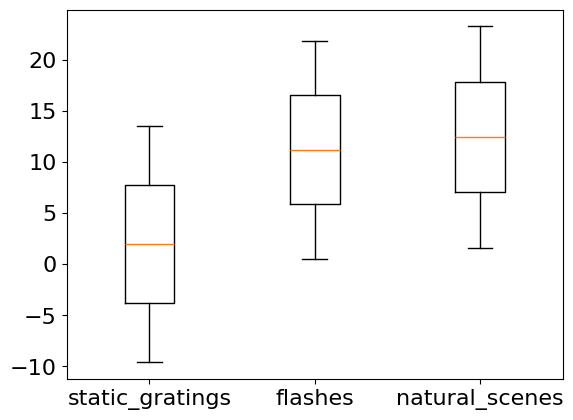

In [141]:
fig, ax = plt.subplots()

ax.boxplot(peak_to_baseline_stims.T, positions=[-1,0,1], )

ax.set_xticklabels(stimulus_names)

In [138]:
peak_to_baseline_stims.shape

(3, 2)

In [ ]:
peak_to_baseline_stims

In [ ]:
'''sys.path.append(str(root))
sessions = (root/"data").glob("ses*")
for ses in sessions:
    print(ses.name)'''

ses_name = "ses_754312389"
ses = root/"data"/ses_name
for file in ses.glob("*"):
    print(file.name)

units = pd.read_csv(ses/f"{ses.name}_units.csv", index_col=0)
print(units.ecephys_structure_acronym.unique())

stimuli = pd.read_csv(ses/f"{ses.name}_stimuli.csv", index_col=0)

spike_times = np.load(ses/f"{ses.name}_spike_times.npy", allow_pickle=True)
spike_times = spike_times.item()

fig, ax = plt.subplots(nrows = 3, ncols=1, figsize = (5,15), sharex=True, sharey = True)

bins = np.arange(-5,50,5)
np.random.seed(1)
sample_size = 2

stimulus_names = ['static_gratings', 'flashes', 'natural_scenes']
for istruct, structure_acronym in enumerate(units.ecephys_structure_acronym.unique()):
    peak_to_baseline_stims = []
    for istim, stim_name in enumerate(stimulus_names):

        units_v1 = units[units.ecephys_structure_acronym == structure_acronym]
        stimulus = stimuli[stimuli.stimulus_name==stim_name]
        stim_times = np.asarray(stimulus.start_time)

        psth_nrns = []

        inds_sampled = np.random.randint(0, np.min([len(units_v1.index),10]), sample_size)
        for i in tqdm(inds_sampled):

            spike_times_one_unit = spike_times[units_v1.index[i]]

            bin_centers, psth = compute_psth(spike_times_one_unit, stim_times, window=(-0.1, 0.25), bin_width=0.01)

            psth_nrns.append(psth)

        psth_nrns = np.asarray(psth_nrns)

        ind_stim_onset = 10
        psth_nrns = psth_nrns - np.mean(psth_nrns[:,:ind_stim_onset])

        peak_to_baseline = np.max(psth_nrns, axis = 1)

        peak_to_baseline_stims.append(peak_to_baseline)

        #bins = np.linspace(np.floor(peak_to_baseline.min()), np.ceil(peak_to_baseline.max()), 10)
        
    peak_to_baseline_stims = np.asarray(peak_to_baseline_stims)
    
    ax[istruct].boxplot(peak_to_baseline_stims.T )

    ax[istruct].set_title(structure_acronym + ' '+stim_name)

    ax[istruct].set_ylabel('Count')

    ax[istruct].set_xlim([-5,50])

ax[-1].set_xlabel('$\Delta$ Firing rate (Hz)')


ax[-1].set_xticklabels(stimulus_names)

fig.suptitle('Change baseline to peak firing rate, session '+ses_name.split('_')[-1], y = 0.99)

fig_name = 'boxplots_baseline_to_peak_firing_rate.png'

fig.tight_layout()

fig.savefig(fig_name)


<>:66: SyntaxWarning: invalid escape sequence '\D'
<>:66: SyntaxWarning: invalid escape sequence '\D'
C:\Users\atle_\AppData\Local\Temp\ipykernel_32440\2122220199.py:66: SyntaxWarning: invalid escape sequence '\D'
  ax[-1].set_xlabel('$\Delta$ Firing rate (Hz)')


ses_754312389_mean_waveforms.npy
ses_754312389_spike_times.npy
ses_754312389_stimuli.csv
ses_754312389_units.csv
['VISam' 'VISpm' 'VISrl']


  0%|          | 0/2 [00:00<?, ?it/s]

# Make histograms of delay to peak

In [ ]:
'''sys.path.append(str(root))
sessions = (root/"data").glob("ses*")
for ses in sessions:
    print(ses.name)'''
ses_name = "ses_754312389"
ses = root/"data"/ses_name
for file in ses.glob("*"):
    print(file.name)

units = pd.read_csv(ses/f"{ses.name}_units.csv", index_col=0)
print(units.ecephys_structure_acronym.unique())

stimuli = pd.read_csv(ses/f"{ses.name}_stimuli.csv", index_col=0)

spike_times = np.load(ses/f"{ses.name}_spike_times.npy", allow_pickle=True)
spike_times = spike_times.item()

fig, ax = plt.subplots(nrows = 3, ncols=3, figsize = (15,15), sharex=True, sharey = True)

bins = np.arange(0,30,2)
np.random.seed(1)
sample_size = 10

for istim, stim_name in enumerate(['static_gratings', 'flashes', 'natural_scenes']):
    for istruct, structure_acronym in enumerate(units.ecephys_structure_acronym.unique()):
        units_v1 = units[units.ecephys_structure_acronym == structure_acronym]
        stimulus = stimuli[stimuli.stimulus_name==stim_name]
        stim_times = np.asarray(stimulus.start_time)

        psth_nrns = []
        
        inds_sampled = np.random.randint(0, np.min([len(units_v1.index),10]), sample_size)
        for i in tqdm(inds_sampled):

            spike_times_one_unit = spike_times[units_v1.index[i]]

            bin_centers, psth = compute_psth(spike_times_one_unit, stim_times, window=(-0.1, 0.25), bin_width=0.01)

            psth_nrns.append(psth)

        psth_nrns = np.asarray(psth_nrns)

        ind_stim_onset = 10
        #psth_nrns = psth_nrns - np.mean(psth_nrns[:,:ind_stim_onset])

        delay = np.argmax(psth_nrns[:,ind_stim_onset:], axis = 1)

        bins = np.linspace(np.floor(delay.min()), np.ceil(delay.max()), 10)

        
        ax[istim, istruct].hist(delay, bins=bins)

        ax[istim, istruct].set_title(structure_acronym + ' '+stim_name)

        ax[istim,0].set_ylabel('Count')

        ax[istim,istruct].set_xlim([0,40])

ax[-1,1].set_xlabel('Time from stimulus onset (s)')


fig.suptitle('Delay to peak, session '+ses_name.split('_')[-1], y = 0.99)

fig_name = 'delay_to_peak_firing_rate.png'

fig.tight_layout()

fig.savefig(fig_name)

[Text(0.5, 0, 'Time [s]'), Text(0, 0.5, 'Mean firing rate [Hz]')]

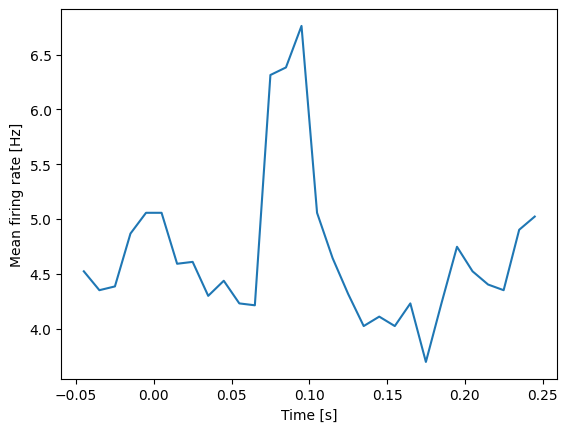

In [56]:
bin_centers, psth = compute_psth(spike_times_one_unit, stim_times, window=(-0.05, 0.25), bin_width=0.01)
fig, ax = plt.subplots()
ax.plot(bin_centers, psth)
ax.set(xlabel="Time [s]", ylabel="Mean firing rate [Hz]")